In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
!pip install category_encoders

In [2]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban','US'])
df1=encoder.fit_transform(df)

In [4]:
sales_value=[]
for value in df['Sales']:
    if value<=8:
        sales_value.append('low')
    else:
        sales_value.append('high')
df['sales_value']=sales_value        

In [5]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_value
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [6]:
df1=df

In [7]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_value
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [8]:
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban','US'])
df1=encoder.fit_transform(df)

In [9]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_value
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1,high
396,6.14,139,23,3,37,120,3,55,11,2,1,low
397,7.41,162,26,12,368,159,3,40,18,1,1,low
398,5.94,100,79,7,284,95,1,50,12,1,1,low


In [10]:
df1=df1.drop(['Sales'], axis=1)
df1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_value
0,138,73,11,276,120,1,42,17,1,1,high
1,111,48,16,260,83,2,65,10,1,1,high
2,113,35,10,269,80,3,59,12,1,1,high
3,117,100,4,466,97,3,55,14,1,1,low
4,141,64,3,340,128,1,38,13,1,2,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1,high
396,139,23,3,37,120,3,55,11,2,1,low
397,162,26,12,368,159,3,40,18,1,1,low
398,100,79,7,284,95,1,50,12,1,1,low


In [11]:
x=df1.iloc[:, :-1]
y=df1.iloc[:, -1]

In [12]:

kfold= KFold(n_splits=10, random_state=7, shuffle=True)
model=RandomForestClassifier(n_estimators=100, max_features=4)

In [13]:
result= cross_val_score(model, x,y, cv=kfold)
print(result.mean())

0.8175000000000001


In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

#### Random Forest Classifier using Entropy criterion

In [15]:
model=RandomForestClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [16]:
model.feature_importances_

array([0.04972442, 0.06138987, 0.17468598, 0.04993823, 0.28604305,
       0.18665281, 0.14698053, 0.01759667, 0.00514512, 0.02184332])

In [18]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
feature_imp=pd.Series(model.feature_importances_, index=fn).sort_values(ascending=False)
feature_imp

Price          0.286043
ShelveLoc      0.186653
Advertising    0.174686
Age            0.146981
Income         0.061390
Population     0.049938
CompPrice      0.049724
US             0.021843
Education      0.017597
Urban          0.005145
dtype: float64

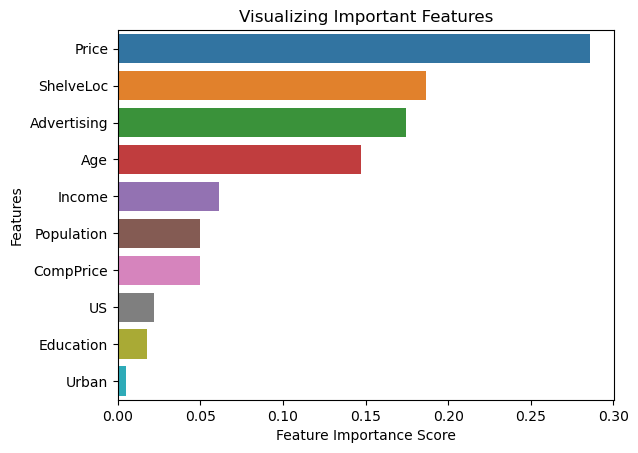

In [19]:
import seaborn as sn
sn.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [20]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

low     59
high    21
dtype: int64

In [21]:
preds

array(['low', 'low', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'low', 'high', 'low', 'low', 'high', 'low', 'high',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'high', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'high', 'high', 'low',
       'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low',
       'low', 'low', 'low', 'high', 'high', 'low', 'low', 'low', 'low',
       'low', 'low', 'high', 'high', 'low', 'low', 'high', 'low', 'low',
       'high', 'low', 'high', 'high', 'low', 'high', 'low', 'high'],
      dtype=object)

In [22]:
pd.crosstab(y_test,preds)

col_0,high,low
sales_value,,
high,17,20
low,4,39


In [23]:
np.mean(preds==y_test)

0.7

#### Random Forest Classifier using Gini criterion¶

In [24]:
model1=RandomForestClassifier(criterion='gini')

In [25]:
model1.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
pred= model1.predict(x_test)
np.mean(pred==y_test)

0.75